In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm_notebook
import pickle

import sys
sys.path.append('../')
from common import Sphere, check_is_bad_grad
from lpme import compute_vector

In [2]:
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
plt.rc('font', size=15)

In [3]:
def get_random_theta(i, q):
    '''
    Constructs random theta vector (spherical coordinates)
    '''
    min_t = 0.0
    max_t = np.pi
    
    if i == q - 1:
        # last theta can be anything
        max_t = 2 * np.pi
    
    return np.random.uniform(min_t, max_t)

def randomly_modify_theta_list(theta_list, search_tol):
    '''
    Randomly modifies each angle in theta list such that it is +/- search_tol from the original
    This is representative of the error from LPME.
    '''
    # any theta measured can be +/- search_tol/2 from the true
    theta_list_mod = []
    for t in theta_list:
        t_m = t + np.random.uniform(-search_tol/2, search_tol/2)
        theta_list_mod.append(t_m)
    return theta_list_mod

def compute_ratios(v):
    '''
    Compute fractions with respect to the 0th (first) coordinate of the vector.
    Ignore the 0th index since that is trivially 1.
    '''
    return ((v / v[0])[1:])

In [4]:
nc = 4
search_tol = 1e-2
well_formed = True

q = nc ** 2 - nc

In [5]:
s = Sphere(np.zeros(q), 1.0, q)

In [6]:
np.random.seed(7)

trials = 1000
coff = [] # coff_i * true_ratio_i = mod_ratio_i

for _ in tqdm_notebook(range(trials)):
    theta_list = [get_random_theta(i, q) for i in range(q-1)]
    v = compute_vector(s, theta_list)
    if well_formed:
        while check_is_bad_grad(v):
            theta_list = [get_random_theta(i, q) for i in range(q-1)]
            v = compute_vector(s, theta_list)
    
    theta_list_m = randomly_modify_theta_list(theta_list, search_tol)
    v_m = compute_vector(s, theta_list_m)
    
    true_ratios = compute_ratios(v)
    mod_ratios = compute_ratios(v_m)
    
    co = mod_ratios / true_ratios
    
    coff += co.tolist()

In [7]:
f = open(f"./trials/coff_k={nc}_wf={well_formed}", "wb")
pickle.dump(coff, f)
f.close()

# Plots

In [8]:
def plot_coff(coff):
    plt.figure(figsize=(8,5))
    
    plt.hist(coff, color='r')
                    
    plt.xlabel(r'$\mathbf{\frac{est_{frac}}{true_{frac}}}$', fontsize = 24, weight = 'bold')
    plt.yticks(fontsize=20)

    plt.ylabel('Count',  fontsize = 24, weight = 'bold')
    if well_formed:
        title = f'k={nc} Fraction Error w Asm. 4'
    else:
        title = f'k={nc} Fraction Error w/o Asm. 4'
    plt.title(title, fontsize = 24, weight = 'bold')
    
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    plt.tight_layout()
    savepath = f'./plots/qme/frac_err_k={nc}_wf={well_formed}.png'
    print(f'saving to {savepath}')
    plt.savefig(savepath, format = "png", bbox_inches = "tight")
    plt.show()

In [9]:
nc = 5
well_formed = True
f = open(f"./trials/coff_k={nc}_wf={well_formed}", "rb")
coff = pickle.load(f)
f.close()

saving to ./plots/qme/frac_err_k=5_wf=True.png


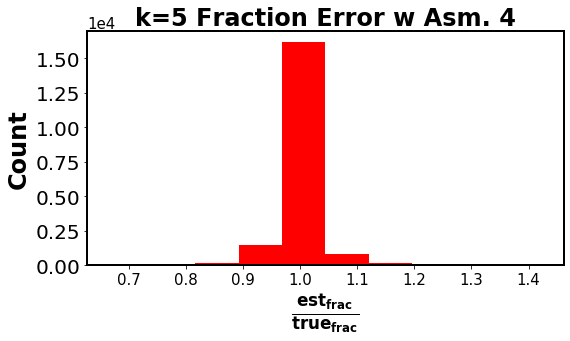

In [10]:
plot_coff(coff)

saving to ./plots/qme/frac_err_k=5_wf=False.png


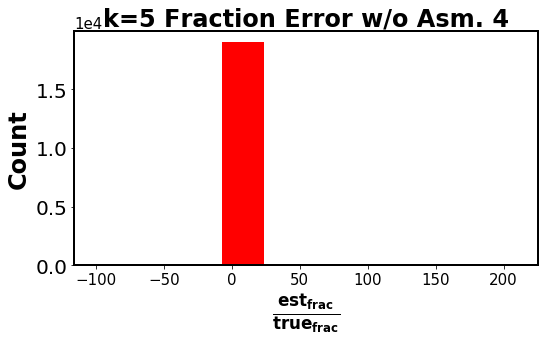

In [11]:
plot_coff(coff)